In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc, precision_score
from sklearn.metrics import f1_score

In [2]:
%%time
#import data
data = pd.read_csv('fraud.csv', low_memory = False)

CPU times: user 13.3 s, sys: 1.64 s, total: 14.9 s
Wall time: 14.7 s


In [3]:
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
data.shape

(6362620, 11)

In [6]:
#data columns
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
data.isnull().values.any()

False

In [8]:
#handle missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [9]:
print(data.type.value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


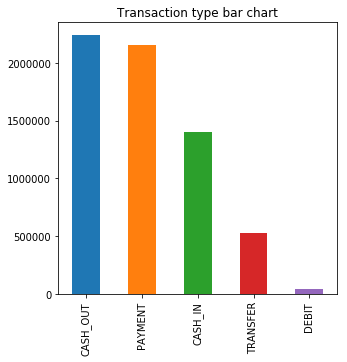

In [10]:
plt.subplots(1, 1, figsize=(5, 5))
data.type.value_counts().plot(kind='bar', title="Transaction type bar chart")

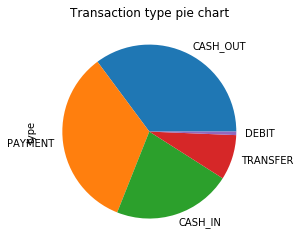

In [11]:
data.type.value_counts().plot(kind='pie', title="Transaction type pie chart")

Text(0, 0.5, 'Number of transaction')

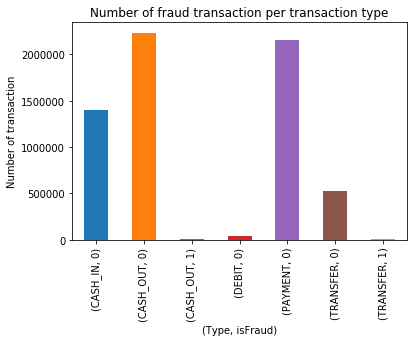

In [12]:
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("Number of fraud transaction per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Number of transaction")

In [13]:
# adding feature type1
data2 = data.copy()
data2["type1"] = np.nan # initialize column
data2.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"type1"] = "CC" 
data2.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"type1"] = "CM"
data2.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"type1"] = "MC"
data2.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"type1"] = "MM"

In [14]:
# Create fraud and valid data set
fraud = data2[data2["isFraud"] == 1]
valid = data2[data2["isFraud"] == 0]

In [15]:
# number of fraud and valid transactions by different type
print("Fraud transactions by type1: \n",fraud.type1.value_counts())
print("\n Valid transactions by type1: \n",valid.type1.value_counts())

Fraud transactions by type1: 
 CC    8213
Name: type1, dtype: int64

 Valid transactions by type1: 
 CC    4202912
CM    2151495
Name: type1, dtype: int64


In [16]:
# From type, we can know all fraud transactions are customer to customer

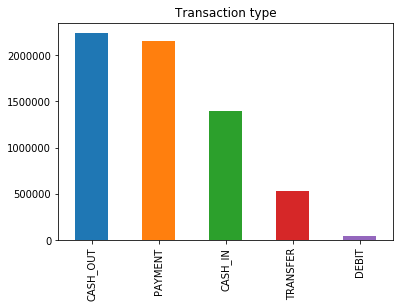

In [17]:
data2.type.value_counts().plot(kind='bar', title="Transaction type")

In [18]:
# delete type1 column.
fraud = fraud.drop('type1',1)
valid = valid.drop('type1',1)
data2 = data2.drop('type1',1)

In [19]:
# number of transactions by type
print("Fraud transactions by type: \n",fraud.type.value_counts())
print("\n Valid transactions by type: \n",valid.type.value_counts())

Fraud transactions by type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

 Valid transactions by type: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


In [20]:
# From above, fraud transactions only exist in cash_out and transfer
# make data2 only contains cash_out and transfer
valid = valid[(valid["type"] == "CASH_OUT")| (valid["type"] == "TRANSFER")]
data2 = data2[(data2["type"] == "CASH_OUT") | (data2["type"] == "TRANSFER")]

In [21]:
# Calculate balance error

In [22]:
orig_bal_error = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
dest_bal_error = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])
print("original account balance error (100%): ", round(orig_bal_error/len(data),3))
print("destination account balance error (100%): ", round(dest_bal_error/len(data),3))

original account balance error (100%):  0.851
destination account balance error (100%):  1.0


In [23]:
# Calculate original balance error and destination balance error
data2["orig_bal_error"] = data2.newbalanceOrig + data2.amount - data2.oldbalanceOrg
data2["dest_bal_error"] = data2.oldbalanceDest + data2.amount - data2.newbalanceDest

# Split to fraud and valid transaction
fraud = data2[data2["isFraud"] == 1]
valid = data2[data2["isFraud"] == 0]
print(len(fraud))
print(len(valid))

8213
2762196


In [24]:
print("ErrorBalanceOrg for fraud transactions: \n",fraud["orig_bal_error"].describe())
print("\n")
print("ErrorBalanceOrg for valid transactions: \n",valid["orig_bal_error"].describe())
print("\n")
print("ErrorBalanceDest for fraud transactions: \n",fraud["dest_bal_error"].describe())
print("\n")
print("errorBalanceDest for valid transactions: \n",valid["dest_bal_error"].describe())

ErrorBalanceOrg for fraud transactions: 
 count    8.213000e+03
mean     1.069233e+04
std      2.651461e+05
min     -7.450581e-09
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+07
Name: orig_bal_error, dtype: float64


ErrorBalanceOrg for valid transactions: 
 count    2.762196e+06
mean     2.868035e+05
std      8.763752e+05
min     -1.000000e-02
25%      5.261343e+04
50%      1.442008e+05
75%      2.804663e+05
max      9.244552e+07
Name: orig_bal_error, dtype: float64


ErrorBalanceDest for fraud transactions: 
 count    8.213000e+03
mean     7.325093e+05
std      1.867748e+06
min     -8.875516e+06
25%      0.000000e+00
50%      2.231460e+03
75%      4.427220e+05
max      1.000000e+07
Name: dest_bal_error, dtype: float64


errorBalanceDest for valid transactions: 
 count    2.762196e+06
mean    -3.091033e+04
std      5.840943e+05
min     -7.588573e+07
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.977761e+06
Name: des

In [25]:
print("Fraud transactions by type: \n",fraud.type.value_counts())
print("\n")
print("Valid transactions by type: \n",valid.type.value_counts())

Fraud transactions by type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


Valid transactions by type: 
 CASH_OUT    2233384
TRANSFER     528812
Name: type, dtype: int64


In [26]:
pd.DataFrame.head(data2,10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_bal_error,dest_bal_error
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.00
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0,213808.94,182703.50
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.0,0.00,0,0,214605.30,237735.30
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.0,2719172.89,0,0,300850.89,-2401220.00
42,1,CASH_OUT,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0,83569.30,396799.55
47,1,CASH_OUT,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0,55011.88,63100.72
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0,5346.89,-5795447.02
51,1,CASH_OUT,23261.30,C2072313080,20411.53,0.0,C2001112025,25742.0,0.00,0,0,2849.77,49003.30
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.0,8383.29,0,0,0.00,54744.51


In [27]:
pd.DataFrame.head(fraud,10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_bal_error,dest_bal_error
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.00
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0,0.00,2806.00
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0,0.00,29008.00
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0,0.00,20128.00
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0,0.00,14250.15
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0,416001.33,-8875516.29
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0,0.00,1277212.77
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0,0.00,-1167772.42
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0,0.00,35063.63


In [28]:
# drop nameOrig and nameDest column.
fraud = fraud.drop(columns=['nameOrig','nameDest'])
valid = valid.drop(columns=['nameOrig','nameDest'])
data2 = data2.drop(columns=['nameOrig','nameDest'])

In [29]:
pd.DataFrame.head(fraud,10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,orig_bal_error,dest_bal_error
2,1,TRANSFER,181.00,181.00,0.0,0.0,0.00,1,0,0.00,181.00
3,1,CASH_OUT,181.00,181.00,0.0,21182.0,0.00,1,0,0.00,21363.00
251,1,TRANSFER,2806.00,2806.00,0.0,0.0,0.00,1,0,0.00,2806.00
252,1,CASH_OUT,2806.00,2806.00,0.0,26202.0,0.00,1,0,0.00,29008.00
680,1,TRANSFER,20128.00,20128.00,0.0,0.0,0.00,1,0,0.00,20128.00
681,1,CASH_OUT,20128.00,20128.00,0.0,6268.0,12145.85,1,0,0.00,14250.15
724,1,CASH_OUT,416001.33,0.00,0.0,102.0,9291619.62,1,0,416001.33,-8875516.29
969,1,TRANSFER,1277212.77,1277212.77,0.0,0.0,0.00,1,0,0.00,1277212.77
970,1,CASH_OUT,1277212.77,1277212.77,0.0,0.0,2444985.19,1,0,0.00,-1167772.42
1115,1,TRANSFER,35063.63,35063.63,0.0,0.0,0.00,1,0,0.00,35063.63


In [30]:
# number of isFlaggedFraud
flagged = data2[data2["isFlaggedFraud"] == 1]
flagged_correctly = sum(flagged["isFraud"] == 1)
flagged_wrongly = len(flagged) - flagged_correctly
total = flagged_correctly + flagged_wrongly
print(flagged_correctly,flagged_wrongly)
print(len(fraud))
print(len(valid))

16 0
8213
2762196


In [31]:
# drop isFlaggedFraud column
fraud = fraud.drop("isFlaggedFraud",1)
valid = valid.drop("isFlaggedFraud",1)
data2 = data2.drop("isFlaggedFraud",1)

In [32]:
# finalize dataset as data3
data3 = data2.copy()

In [33]:
data3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orig_bal_error,dest_bal_error
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


In [34]:
# One Hot Encoding of the 'type' variable
# convert categorical variable into numerical variable
data3 = pd.get_dummies(data3,prefix=['type'])
data3.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,orig_bal_error,dest_bal_error,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0,0,1


In [35]:
# split and Standardize Data.
# create training and testing sets
X = data3.drop("isFraud",1)
y = data3.isFraud
X_train, X_test, y_train, y_test = train_test_split(X, y)
    
# normalize data to standard 0 to 1
scaler = StandardScaler()

# fit training data
scaler.fit(X_train)

# transform data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


In [36]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,orig_bal_error,dest_bal_error,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.0,0.0,0.0,0.00,0.00,181.0,0,1
3,1,181.00,181.0,0.0,21182.0,0.00,0.00,21363.0,1,0
15,1,229133.94,15325.0,0.0,5083.0,51513.44,213808.94,182703.5,1,0
19,1,215310.30,705.0,0.0,22425.0,0.00,214605.30,237735.3,0,1
24,1,311685.89,10835.0,0.0,6267.0,2719172.89,300850.89,-2401220.0,0,1


In [37]:
y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: int64

In [38]:
# 3.1 Model: ANN

In [39]:
F1 = []
AUC = []
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
#max_iter_number = 800
#parameters: max_iter, dafult=200
print("Maximum number of iterations               F1 score                Area Under Curve")
for max_iter_number in range (100, 1100, 100):
    clf = MLPClassifier(hidden_layer_sizes=hidden_layers, activation='relu', solver='adam', alpha=0.0001, 
              batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
              power_t=0.5, max_iter=max_iter_number, shuffle=True, random_state=None, tol=0.0001, 
              verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
              early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
              epsilon=1e-08, n_iter_no_change=10)
    # training model
    clf.fit(X_train,y_train)
    fprclf, recallclf, thresholdsclf = roc_curve(y_test, clf.predict(X_test))
    AUC_clf = auc(fprclf, recallclf)    
    F1.append(f1_score(y_test,clf.predict(X_test)))
    AUC.append(AUC_clf)
    print("          ", max_iter_number, "                      ", f1_score(y_test,clf.predict(X_test)), "        ", AUC_clf)

Maximum number of iterations               F1 score                Area Under Curve
           100                        0.8812499999999999          0.9051289679591967
           200                        0.864033925258415          0.8902858451503366
           300                        0.870408163265306          0.9084336679633555
           400                        0.8539029535864978          0.887630022616525
           500                        0.8520614389652384          0.8785615419392538
           600                        0.7969569779643232          0.8635967707954552
           700                        0.8424193110930296          0.871853664707415
           800                        0.8214185590131764          0.8508040388839658
           900                        0.8500658761528328          0.8861867241322438
           1000                        0.8389224848818032          0.8654040776051346


In [42]:
#Cross-Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scoring = ['f1_micro']
#scores = cross_validate(clf, X, y, scoring=scoring, cv=5, return_train_score=True)

In [43]:
#scores

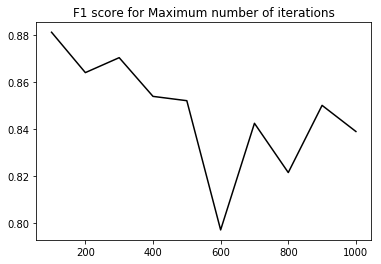

In [44]:
a = np.linspace(100, 1100, 10, endpoint=False)
b = F1
plt.title('F1 score for Maximum number of iterations')
plt.plot(a, b, color='black');

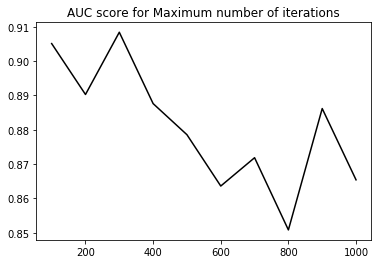

In [45]:
a = np.linspace(100, 1100, 10, endpoint=False)
b = AUC
plt.title('AUC score for Maximum number of iterations')
plt.plot(a, b, color='black');

In [46]:
# evaluating model by using F1 and AUC score
CM_clf = confusion_matrix(y_test,clf.predict(X_test))
CR_clf = classification_report(y_test,clf.predict(X_test))
fprclf, recallclf, thresholdsclf = roc_curve(y_test, clf.predict(X_test))
AUC_clf = auc(fprclf, recallclf)

In [47]:
print("Confusion Matrix:\n",CM_clf)

Confusion Matrix:
 [[690491     24]
 [   562   1526]]


In [48]:
print("Classification Report:\n",CR_clf)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    690515
           1       0.98      0.73      0.84      2088

   micro avg       1.00      1.00      1.00    692603
   macro avg       0.99      0.87      0.92    692603
weighted avg       1.00      1.00      1.00    692603



In [49]:
print("Area Under Curve:\n",AUC_clf)

Area Under Curve:
 0.8654040776051346


In [50]:
print(f1_score(y_test,clf.predict(X_test)))

0.8389224848818032
